<a href="https://colab.research.google.com/github/amarabuco/am-pos-2020-2/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Haliotis_tuberculata_coccinea_01.JPG/800px-Haliotis_tuberculata_coccinea_01.JPG" width='300'/>

# Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. **The number of rings is the value to predict: either as a continuous value or as a classification problem.**

Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)
* Length / continuous / mm / Longest shell measurement
* Diameter / continuous / mm / perpendicular to length
* Height / continuous / mm / with meat in shell
* Whole weight / continuous / grams / whole abalone
* Shucked weight / continuous / grams / weight of meat
* Viscera weight / continuous / grams / gut weight (after bleeding)
* Shell weight / continuous / grams / after being dried
* Rings / integer / -- / +1.5 gives the age in years

The readme file contains attribute statistics.

In [ ]:
colunas = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=colunas)
dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Pre-processamento

In [ ]:
X = dataset[dataset.columns[0:-1]]
y = pd.Series(dataset['rings'])

In [ ]:
X['sex'] = (X['sex'] == 'M').astype('int8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=colunas[:-1])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   float64
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


In [ ]:
dataset.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


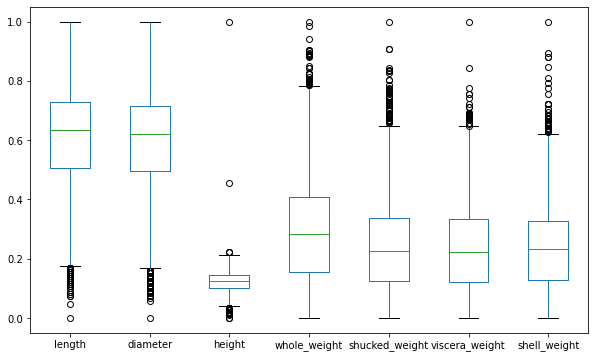

In [ ]:
X[X.columns[1:]].plot.box(figsize=(10,6))

In [ ]:
X.corr()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
sex,1.000000,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391
length,0.236543,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
diameter,0.240376,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
height,0.215459,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
whole_weight,0.252038,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
shucked_weight,0.251793,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
viscera_weight,0.242194,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
shell_weight,0.235391,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ddf3af98>,
      dtype=object)

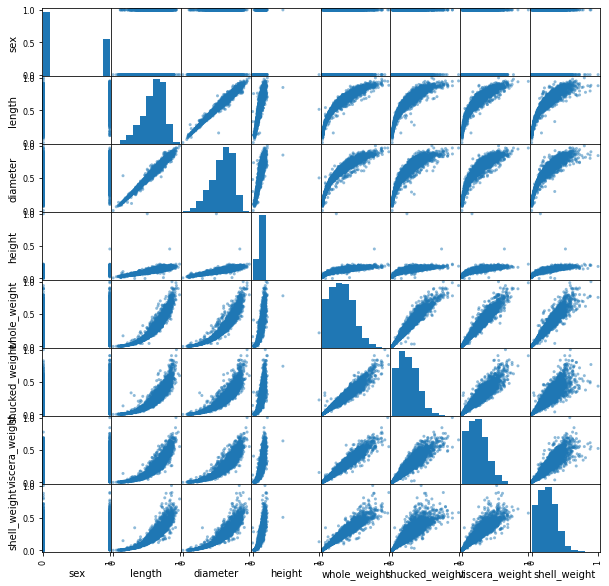

In [ ]:
pd.plotting.scatter_matrix(X, figsize=(10,10))

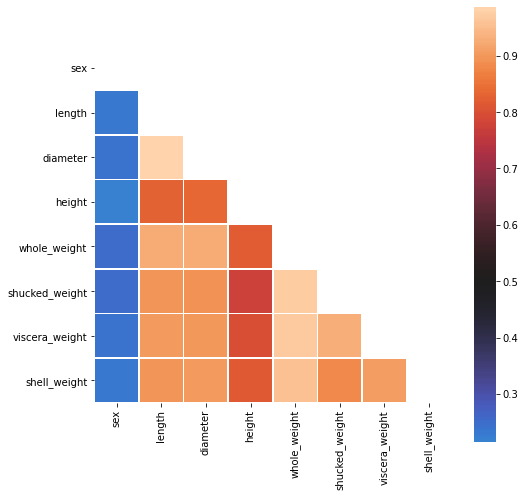

In [ ]:
mask = np.zeros_like(dataset.corr()) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(X.corr(), mask=mask, center=0.5, square=True, linewidths=.5)

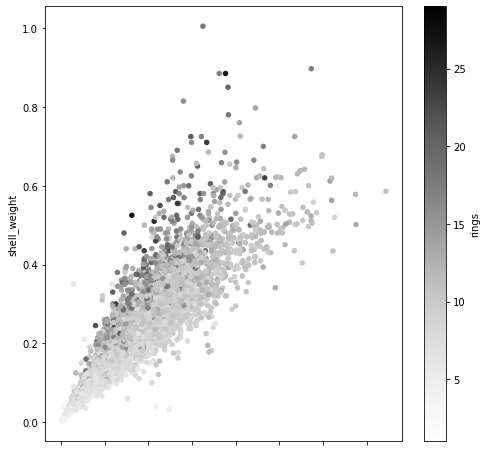

In [ ]:
dataset.plot.scatter(x='shucked_weight', y='shell_weight', c='rings', figsize=(8,8))

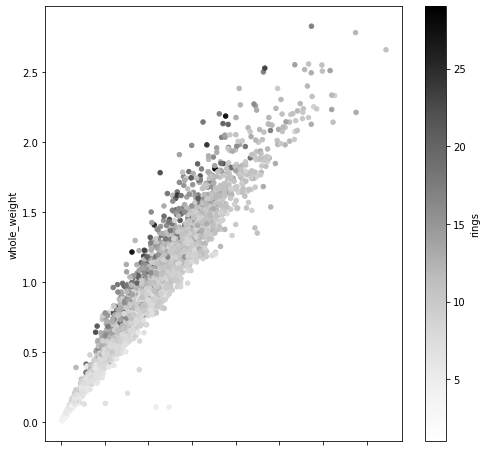

In [ ]:
dataset.plot.scatter(x='shucked_weight', y='whole_weight', c='rings', figsize=(8,8))

tentativa de PCA, mas não deu certo


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

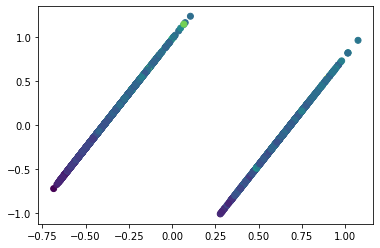

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=X_pca[:,0], y=X_pca[:,1], c=dataset['rings']) 

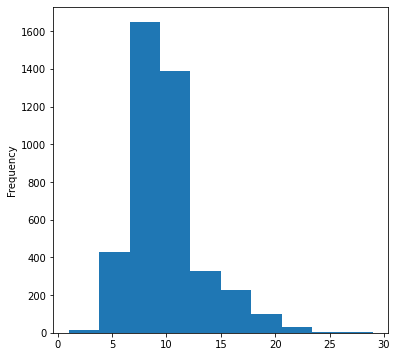

In [ ]:
y.plot.hist(figsize=(6,6))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=55)

# Modelo

## KNN

In [ ]:
knn = KNeighborsClassifier()
#knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
#knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
%%time
cv_results = cross_validate(knn, X, y, cv=10, scoring='accuracy')
sorted(cv_results.keys())
cv_results['test_score'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CPU times: user 240 ms, sys: 55 µs, total: 240 ms
Wall time: 245 ms


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

0


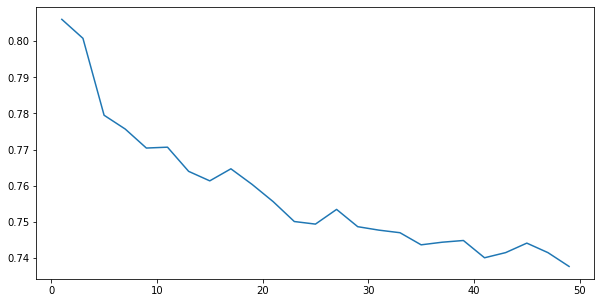

In [ ]:
kresults = pd.Series(np.zeros(50))
for k in range(1,50,2):
  #print(k)
  knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
  #knn = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(knn, X, y, cv=10, scoring='accuracy')
  sorted(cv_results.keys())
  #print(cv_results['test_score'].mean())
  kresults[k] = 1 - cv_results['test_score'].mean()
print(kresults.idxmin())
kbest = kresults.idxmin()
kresults[kresults != 0].plot(figsize=(10,5))

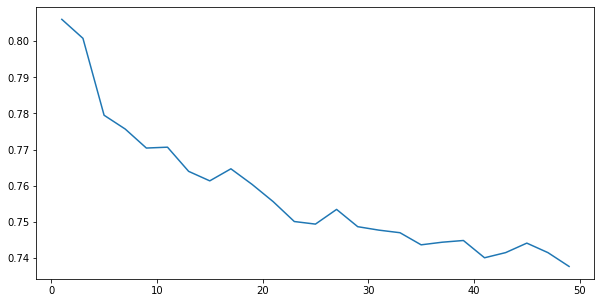

In [ ]:
kresults[kresults != 0].plot(figsize=(10,5))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23, weights='distance')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')

In [ ]:
y_pred = knn.predict(X_test)
results = pd.DataFrame({'true': y_test,'pred': y_pred})
results['check'] = results['true'] == results['pred']
results['check'].sum() / results['check'].count()

0.23640319071791152

In [ ]:
#plt.figure(figsize=(14,5))
#ax1, ax2 = plt.subplot(121), plt.subplot(122), 
#ax1.hist(results['true'], color='g')
#ax2.hist(results['pred'], color='r')

#### poly features

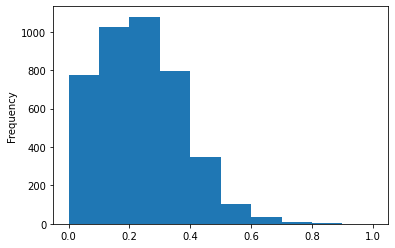

In [ ]:
X['shell_weight'].plot.hist()

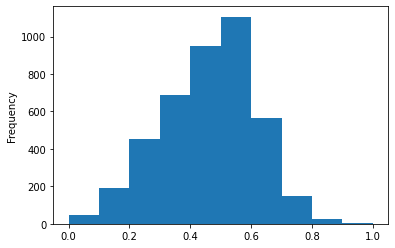

In [ ]:
X['shell_weight'].apply(lambda x: x**(1/2)).plot.hist()

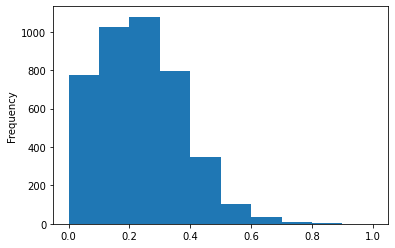

In [ ]:
X['shell_weight'].plot.hist()

In [ ]:
X_new = X.copy()
for col in X.columns[1:]:
  if col == 'diameter': 
    X_new['area'] = 2*np.pi*(X_new[col]/2)**2
  else:
    X_new[col+'2'] = X_new[col] ** (1/2)
  #X_new[col+'3'] = X_new[col] ** 3

In [ ]:
X_new.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,length2,area,height2,whole_weight2,shucked_weight2,viscera_weight2,shell_weight2
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.716599,0.426392,0.289950,0.425835,0.387689,0.363764,0.384684
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.609608,0.195670,0.282216,0.281349,0.257373,0.251395,0.261268
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.784133,0.591115,0.345643,0.488943,0.414515,0.430869,0.455821
3,1.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.702313,0.426392,0.332595,0.426666,0.379803,0.386575,0.391107
4,0.0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.587022,0.177479,0.266076,0.268135,0.243959,0.226604,0.230897


In [ ]:
cv_results = cross_validate(knn, X_new.drop(X_new.columns[1:7],axis=1), y, cv=10, scoring='accuracy')
sorted(cv_results.keys())
cv_results['test_score'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.25043486741707116

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
results2 = pd.DataFrame({'true': y_test,'pred': y_pred})
results2['check'] = results2['true'] == results2['pred']
results2['check'].sum() / results2['check'].count()

0.23640319071791152

### dimensionality reduction

In [ ]:
cv_results = cross_validate(knn, X[['shucked_weight','shell_weight']], y, cv=10, scoring='accuracy')
sorted(cv_results.keys())
cv_results['test_score'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.24349018392941152

### Regression

19


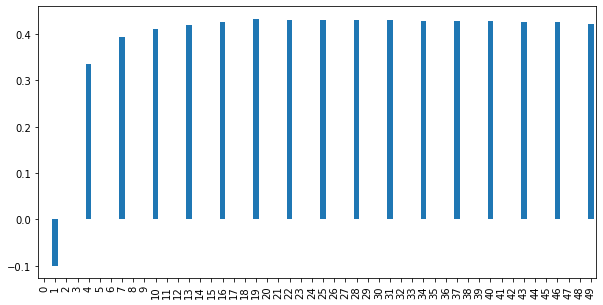

In [ ]:
kresults = pd.Series(np.zeros(50))
for k in range(1,50,3):
  #print(k)
  knn = KNeighborsRegressor(n_neighbors=k, weights='distance', p=2)
  #knn = KNeighborsClassifier(n_neighbors=k)
  cv_results = cross_validate(knn, X, y, cv=10)
  sorted(cv_results.keys())
  #print(cv_results['test_score'].mean())
  kresults[k] = cv_results['test_score'].mean()
print(kresults.idxmax())
kbest = kresults.idxmax()
kresults.plot.bar(figsize=(10,5))

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=19, weights='distance', p=2)

In [ ]:
%%time
cv_results = cross_validate(knnr, X, y, cv=10)
sorted(cv_results.keys())
cv_results['test_score'].mean()

CPU times: user 159 ms, sys: 967 µs, total: 160 ms
Wall time: 162 ms


In [ ]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')

In [ ]:
predr = knnr.predict(X_test)
predr = pd.Series(map(lambda x : int(x),predr))

In [ ]:
accuracy_score(y_test, predr)

0.2472806381435823

In [ ]:
results2 = pd.DataFrame({'true': y_test,'pred': predr})
results2['check'] = results2['true'] == results2['pred']
results2['check'].sum() / results2['check'].count()

0.019745502413339184

## LVQ

In [ ]:
!pip install sklearn-lvq

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn_lvq import GlvqModel

In [ ]:
%%time
for prototypes in [1]:
  print (prototypes)
  glvq = GlvqModel(prototypes)
  cv_results = cross_validate(glvq, X_pca, y, cv=10, scoring='accuracy')
  sorted(cv_results.keys())
  print(cv_results['fit_time'].sum())
  print(cv_results['test_score'].mean())

1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


257.6965913772583
0.16064163023648068
CPU times: user 4min 14s, sys: 2.76 s, total: 4min 17s
Wall time: 4min 17s


In [ ]:
glvq.fit(X_train, y_train)

GlvqModel(beta=2, c=None, display=False, gtol=1e-05, initial_prototypes=None,
          max_iter=2500, prototypes_per_class=1, random_state=None)

In [ ]:
y_pred2 = glvq.predict(X_test)
results3 = pd.DataFrame({'true': y_test,'pred': y_pred2})
results3['check'] = results3['true'] == results3['pred']
results3['check'].sum() / results3['check'].count()

0.19796954314720813

In [ ]:
plt.figure(figsize=(14,5))
ax1, ax2, ax3, ax4 = plt.subplot(141), plt.subplot(142), plt.subplot(143), plt.subplot(144)
ax1.hist(results2['true'], color='g', bins=15)
ax1.set_title('ground_truth')
ax2.hist(results['pred'], color='r', bins=15)
ax2.set_title('knn')
ax3.hist(results2['pred'], color='y', bins=15)
ax3.set_title('knnr')
ax4.hist(results3['pred'], color='b', bins=15)
ax4.set_title('lvq')